# Pelota que cae

Las ecuaciones de Newton son: 

$m \frac{d^2\vec r}{dt^2} = -g \hat k + \vec f_{fricc} + \vec f_{ext}$

In [1]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [2]:
def fuerza(v_r,t,gama=0,viento=[0,0],m=1,g=9.8):
    # v_r = [ry,rz,vy,vz]
    dvz = -g/m - (gama/m)*v_r[3] + viento[1]
    dvy = -(gama/m)*v_r[2] + viento[0]
    drz = v_r[3]
    dry = v_r[2]
    return [dry,drz,dvy,dvz]

In [3]:
def rebote(punto,dt,param):
    error = 1e-5
    dt = dt/2
    sol = odeint(fuerza,punto,[0,dt],args=(param[0],param[1],param[2],param[3],))
    while abs(sol[:,1][0]-sol[:,1][1]) > error:
        if sol[:,1][0]*sol[:,1][1] < 0:
            punto = sol[0]
        else:
            punto = sol[1]
        dt = dt/2
        sol = odeint(fuerza,punto,[0,dt],args=(param[0],param[1],param[2],param[3],))
        #print sol[0]
    return [sol[0][0],sol[0][1],sol[0][2],-sol[0][3]]

In [4]:
def trayectoria(pto_ini,t_fin,param=[0,[0,0],1,9.8]):
    t_total,dt = [0],0.01
    y=[pto_ini[0]]
    z=[pto_ini[1]]
    t_actual = 0
    while t_actual <= t_fin:
        t_actual = t_actual + dt
        sol = odeint(fuerza,pto_ini,[0,dt],args=(param[0],param[1],param[2],param[3],))
        if sol[:,1][0]*sol[:,1][1] < 0.:
            sol=rebote(sol[0],dt,param)
            y.append(sol[0])
            z.append(sol[1])
            pto_ini=sol
        else:
            y.append(sol[:,0][1])
            z.append(sol[:,1][1])
            pto_ini=sol[1]
    return y,z

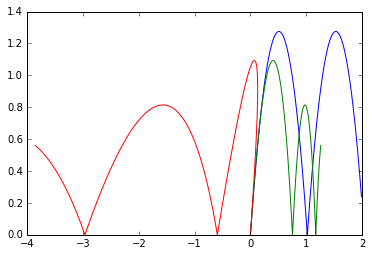

In [6]:
y_id,z_id=trayectoria([0,0,1,5],2)
y_f,z_f=trayectoria([0,0,1,5],2,[0.5,[0,0],1,9.8])
y_v,z_v=trayectoria([0,0,1,5],2,[0.5,[-3.5,0],1,9.8])
plot(y_id,z_id,y_f,z_f,y_v,z_v)
show()